In [38]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pickle

In [2]:
news = pd.read_csv('OnlineNewsPopularity.csv')

In [6]:
news.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [40]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [37]:
news[news[' average_token_length'] == 0].url.head()
# checked why the average word length for these articles is 0 by going to the url manually 

893     http://mashable.com/2013/01/23/actual-facebook...
917     http://mashable.com/2013/01/23/fitness-gadget-...
1062    http://mashable.com/2013/01/25/data-vs-nature-...
1121    http://mashable.com/2013/01/26/infographics-ma...
1312    http://mashable.com/2013/01/29/social-tv-chart...
Name: url, dtype: object

In [3]:
#  dropping columns that do not give me average data and where attribute information is unclear
dropped_news = news.drop(columns=['url', ' timedelta', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
                   ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' min_positive_polarity',
                   ' max_positive_polarity', ' min_negative_polarity', ' max_negative_polarity',
                   ' self_reference_min_shares', ' self_reference_max_shares'])

In [33]:
dropped_news.rename(columns=lambda x: x.lstrip(), inplace=True)

In [ ]:
'''NEED TO REMOVE ROWS WHERE AVERAGE TOKEN LENGTH == 0 BECAUSE THESE MASHABLE  ('COULD NOT FIND THE PAGE')'''

In [138]:
dropped_news['shares']

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [63]:
dropped_news.isnull().nunique()
# check to see if my data has null values --> it does not

 n_tokens_title                   1
 n_tokens_content                 1
 n_unique_tokens                  1
 n_non_stop_words                 1
 n_non_stop_unique_tokens         1
 num_hrefs                        1
 num_self_hrefs                   1
 num_imgs                         1
 num_videos                       1
 average_token_length             1
 num_keywords                     1
 data_channel_is_lifestyle        1
 data_channel_is_entertainment    1
 data_channel_is_bus              1
 data_channel_is_socmed           1
 data_channel_is_tech             1
 data_channel_is_world            1
 self_reference_avg_sharess       1
 weekday_is_monday                1
 weekday_is_tuesday               1
 weekday_is_wednesday             1
 weekday_is_thursday              1
 weekday_is_friday                1
 weekday_is_saturday              1
 weekday_is_sunday                1
 is_weekend                       1
 LDA_00                           1
 LDA_01                     

In [64]:
dropped_news.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.016612,0.682150,0.287934,0.353825,-0.259524,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.010828,0.190206,0.156156,0.104542,0.127726,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.009615,0.600000,0.185185,0.306244,-0.328383,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.015337,0.710526,0.280000,0.358755,-0.253333,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.021739,0.800000,0.384615,0.411428,-0.186905,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,0.184932,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


# creating log and sqrt of my feature variable to get it ready for testing

In [5]:
dropped_news['shares_log'] = np.log(dropped_news['shares'])
dropped_news['shares_sqrt'] = np.log(dropped_news['shares'])

In [6]:
dropped_news.corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_log,shares_sqrt
n_tokens_title,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,...,0.034186,-0.049619,-0.017096,0.077245,0.000240,-0.146954,0.040550,0.008783,-0.019030,-0.019030
n_tokens_content,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,...,0.101053,0.135123,-0.130375,0.004484,0.023358,0.007136,0.013439,0.002459,0.024842,0.024842
n_unique_tokens,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,...,-0.001657,-0.000487,0.001453,-0.004678,-0.002333,-0.009242,-0.004217,0.000806,0.004971,0.004971
n_non_stop_words,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,...,0.001245,0.002285,-0.001372,-0.005389,-0.001650,-0.008511,-0.004391,0.000443,0.005406,0.005406
n_non_stop_unique_tokens,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,...,0.001709,0.004671,-0.001972,-0.005860,-0.002910,-0.008572,-0.005342,0.000114,0.003709,0.003709
num_hrefs,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,...,0.059817,0.188236,-0.152146,0.043950,0.039041,0.009443,0.056525,0.045404,0.105105,0.105105
num_self_hrefs,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,0.126879,...,-0.010187,0.098062,-0.058222,-0.011239,0.026224,0.008961,-0.006709,-0.001900,0.029148,0.029148
num_imgs,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,0.033924,...,0.040029,0.096446,-0.072500,0.056815,0.046310,-0.013759,0.063307,0.039388,0.091518,0.091518
num_videos,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,-0.002940,...,0.074067,0.097440,-0.115976,0.061028,0.021980,-0.021982,0.055231,0.023936,0.032049,0.032049
average_token_length,-0.071403,0.167789,0.026407,0.031554,0.034185,0.222588,0.126879,0.033924,-0.002940,1.000000,...,0.322505,0.540117,-0.324529,-0.040406,-0.016718,0.026586,-0.036953,-0.022007,-0.045283,-0.045283


# EDA looking at relationship between 'shares' and other variables

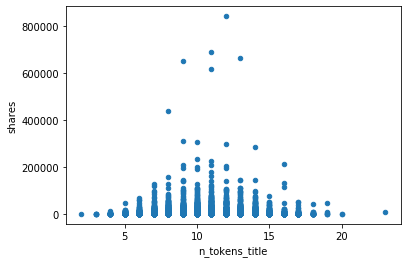

In [36]:
dropped_news.plot.scatter('n_tokens_title', 'shares')

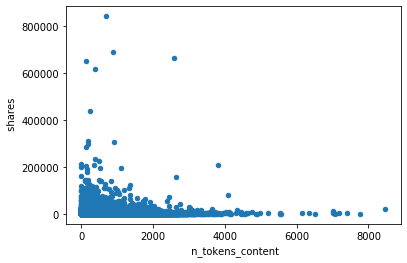

In [71]:
dropped_news.plot.scatter('n_tokens_content', 'shares')

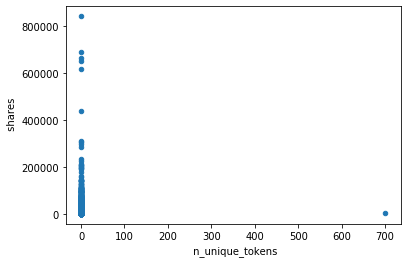

In [72]:
dropped_news.plot.scatter('n_unique_tokens', 'shares')

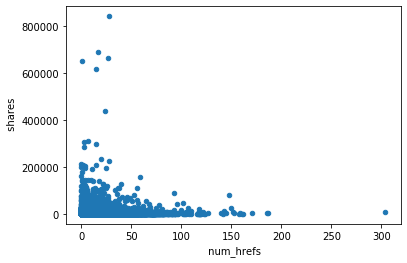

In [74]:
dropped_news.plot.scatter('num_hrefs', 'shares')

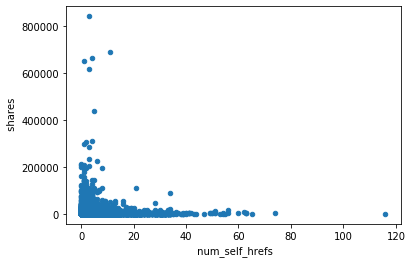

In [77]:
dropped_news.plot.scatter('num_self_hrefs', 'shares')

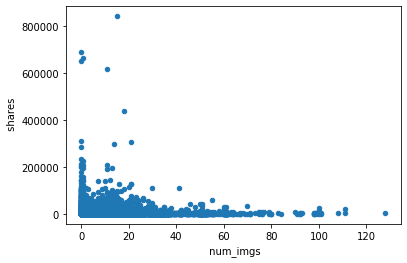

In [78]:
dropped_news.plot.scatter('num_imgs', 'shares')

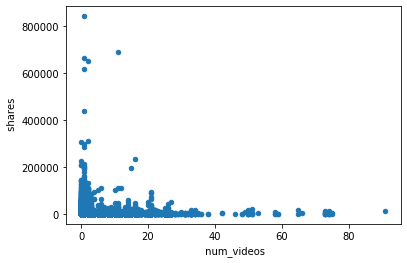

In [79]:
dropped_news.plot.scatter('num_videos', 'shares')

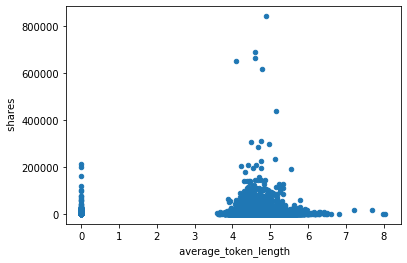

In [83]:
dropped_news.plot.scatter('average_token_length', 'shares')
# what does it mean when the average length of words in the content is 0

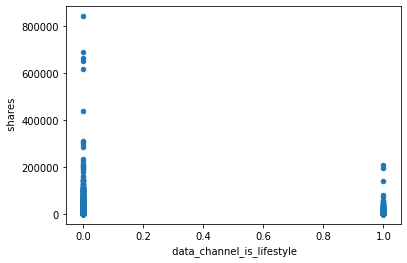

In [90]:
dropped_news.plot.scatter('data_channel_is_lifestyle', 'shares')

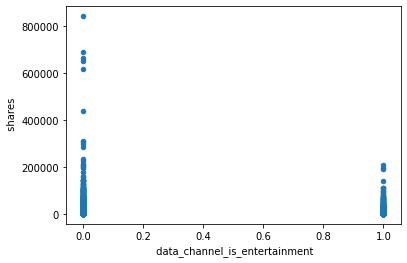

In [91]:
dropped_news.plot.scatter('data_channel_is_entertainment', 'shares')

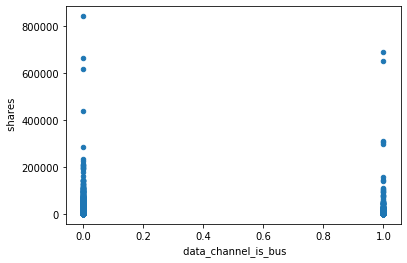

In [92]:
dropped_news.plot.scatter('data_channel_is_bus', 'shares')

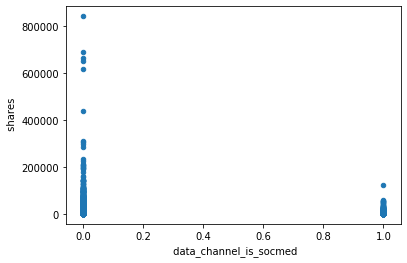

In [93]:
dropped_news.plot.scatter('data_channel_is_socmed', 'shares')

In [102]:
dropped_news.boxplot(column=box_col, by='shares')

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11bb90cb0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11bcf6200> (for post_execute):


KeyboardInterrupt: 

In [101]:
# box_col = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
#            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [107]:
dropped_news.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' avg_negative_polarity', ' title_subjectivity',
       ' title

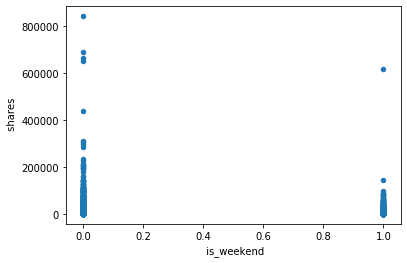

In [109]:
dropped_news.plot.scatter('is_weekend', 'shares')

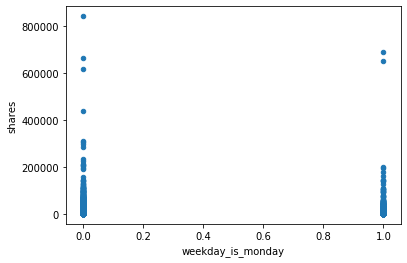

In [139]:
dropped_news.plot.scatter('weekday_is_monday', 'shares')

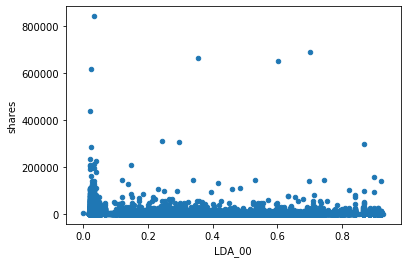

In [140]:
dropped_news.plot.scatter('LDA_00', 'shares')

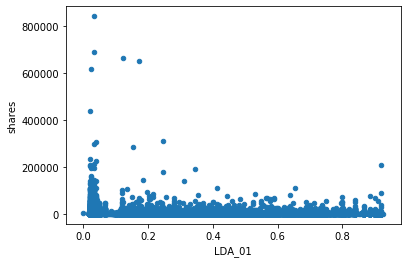

In [141]:
dropped_news.plot.scatter('LDA_01', 'shares')

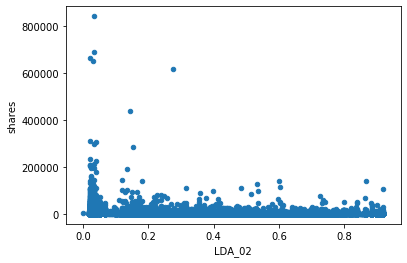

In [142]:
dropped_news.plot.scatter('LDA_02', 'shares')

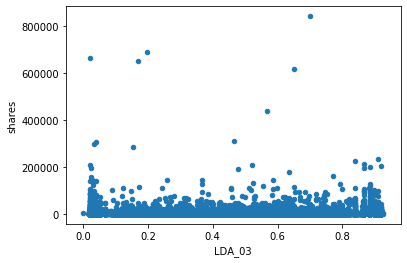

In [143]:
dropped_news.plot.scatter('LDA_03', 'shares')

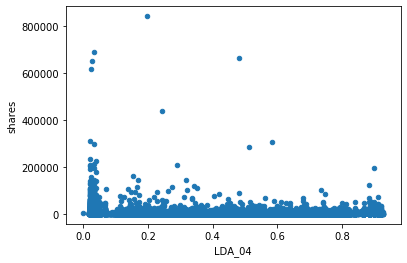

In [144]:
dropped_news.plot.scatter('LDA_04', 'shares')

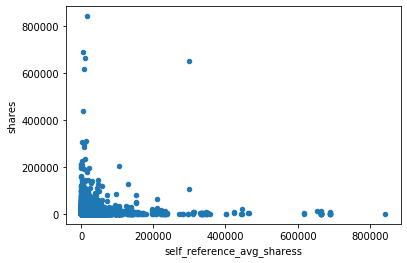

In [148]:
dropped_news.plot.scatter('self_reference_avg_sharess', 'shares')
# dropped_news.corr()

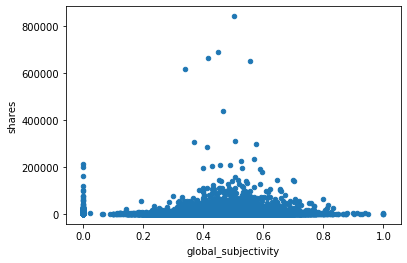

In [150]:
dropped_news.plot.scatter('global_subjectivity', 'shares')
# text subjectivity
# if the text has no subjectivity then, on average it receives more shares than subjective text

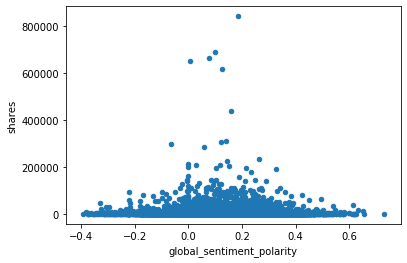

In [151]:
dropped_news.plot.scatter('global_sentiment_polarity', 'shares')
# text sentiment polarity

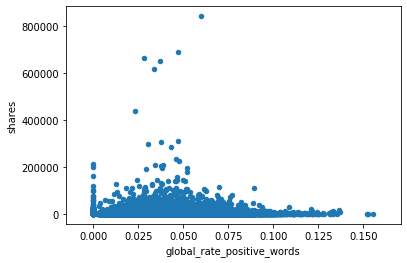

In [152]:
dropped_news.plot.scatter('global_rate_positive_words', 'shares')

# an article is on average more likely to be shared if there are no positive words in the article, but
# articles with more positive words are shared more often than articles with negative words (on average)

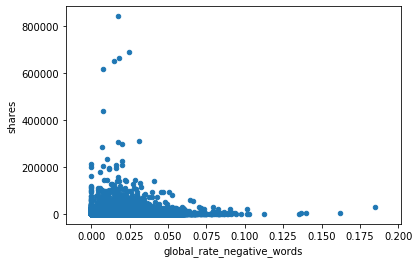

In [153]:
dropped_news.plot.scatter('global_rate_negative_words', 'shares')

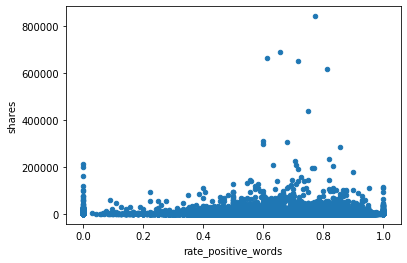

In [154]:
dropped_news.plot.scatter('rate_positive_words', 'shares')
# higher rate of positive words than negative words

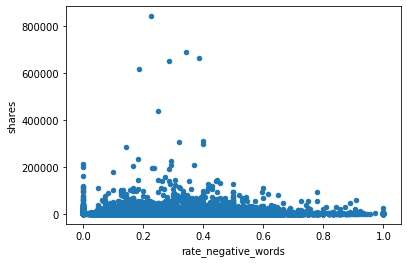

In [155]:
dropped_news.plot.scatter('rate_negative_words', 'shares')

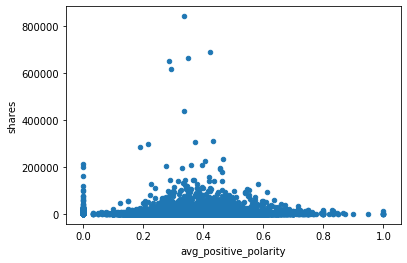

In [156]:
dropped_news.plot.scatter('avg_positive_polarity', 'shares')

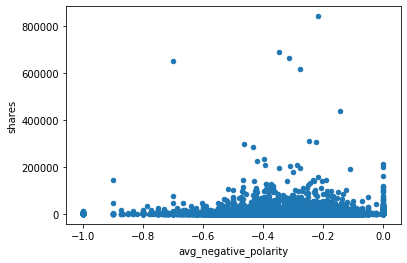

In [157]:
dropped_news.plot.scatter('avg_negative_polarity', 'shares')

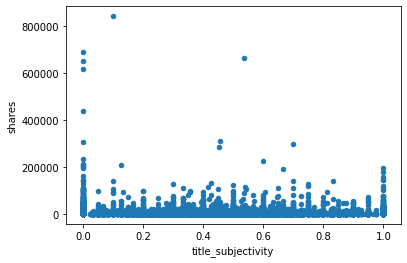

In [158]:
dropped_news.plot.scatter('title_subjectivity', 'shares')

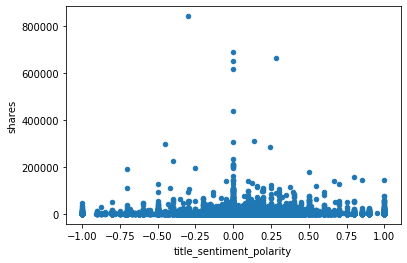

In [159]:
dropped_news.plot.scatter('title_sentiment_polarity', 'shares')

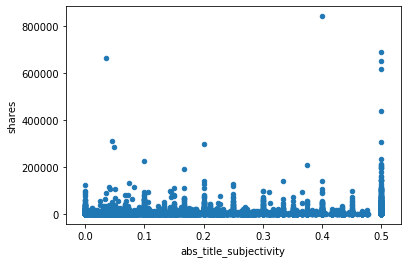

In [160]:
dropped_news.plot.scatter('abs_title_subjectivity', 'shares')

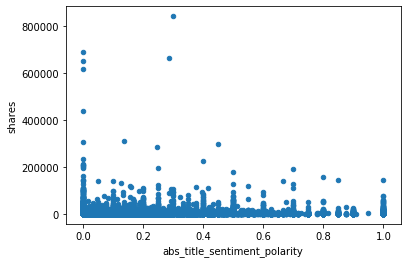

In [161]:
dropped_news.plot.scatter('abs_title_sentiment_polarity', 'shares')

#  ols models for categorical variables

In [15]:
day_ols = ols(formula='shares~weekday_is_monday+weekday_is_tuesday+weekday_is_wednesday+weekday_is_thursday+weekday_is_friday+weekday_is_saturday+weekday_is_sunday',
              data=dropped_news).fit()
day_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.788
Date:                Wed, 06 May 2020   Prob (F-statistic):            0.00673
Time:                        21:51:02   Log-Likelihood:            -4.2735e+05
No. Observations:               39644   AIC:                         8.547e+05
Df Residuals:                   39636   BIC:                         8.548e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.804e+15   5.74e+15     -0.314      0.753   -1.31e+16    9.45e+15
weekday_is_monday     1.804e+15   5.74e+15      0.314      0.753   -9.45e+15    1.31e+16
weekday_is_tuesday    1.804e+15   5.74e+15      0.314      0.753   -9.45e+15    1.31e+16
weekday_is_wednesday  1.804e+15   5.74e+15      0.314      0.753   -9.45e+15    1.31e+16
weekday_is_thursday   1.804e+15   5.74e+15      0.314      0.753   -9.45e+15    1.31e+16
weekday_is_friday     1.804e+15   5.74e+15      0.314      0.753   -9.45e+15    1.31e+16
weekday_is_saturday   1.804e+15   5.74e+15      0.314      0.753   -9.45e+15    1.31e+16
weekday_is_sunday     1.804e+15   5.74e+15      0.314      0.753   -9.45e+15    1.31e+16
==============================================================================
Omnibus:                   108124.645   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5559098262.753
Skew:                          33.975   Prob(JB):                         0.00
Kurtosis:                    1836.247   Cond. No.                     3.00e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.12e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
lda_ols = ols(formula='shares~LDA_00+LDA_01+LDA_02+LDA_03+LDA_04', data=dropped_news).fit()
lda_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     66.04
Date:                Wed, 06 May 2020   Prob (F-statistic):           6.19e-69
Time:                        21:51:03   Log-Likelihood:            -4.2720e+05
No. Observations:               39644   AIC:                         8.544e+05
Df Residuals:                   39638   BIC:                         8.545e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5900.0000   1.16e+04      0.510      0.610   -1.68e+04    2.86e+04
LDA_00     -2564.7107   1.16e+04     -0.221      0.825   -2.53e+04    2.01e+04
LDA_01     -3263.1247   1.16e+04     -0.282      0.778    -2.6e+04    1.94e+04
LDA_02     -4284.6961   1.16e+04     -0.370      0.711    -2.7e+04    1.84e+04
LDA_03        50.0741   1.16e+04      0.004      0.997   -2.26e+04    2.27e+04
LDA_04     -2796.9862   1.16e+04     -0.242      0.809   -2.55e+04    1.99e+04
==============================================================================
Omnibus:                   108394.426   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5684188134.611
Skew:                          34.197   Prob(JB):                         0.00
Kurtosis:                    1856.769   Cond. No.                         536.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
token_ols = ols(formula='shares~n_tokens_title+n_tokens_content+n_unique_tokens+average_token_length',
                data=dropped_news).fit()
token_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.701
Date:                Wed, 06 May 2020   Prob (F-statistic):           0.000139
Time:                        21:51:03   Log-Likelihood:            -4.2735e+05
No. Observations:               39644   AIC:                         8.547e+05
Df Residuals:                   39639   BIC:                         8.548e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4319.2871    445.751      9.690      0.000    3445.605    5192.969
n_tokens_title          38.8744     27.700      1.403      0.161     -15.419      93.168
n_tokens_content         0.1512      0.126      1.202      0.229      -0.095       0.398
n_unique_tokens          4.8510     16.589      0.292      0.770     -27.664      37.366
average_token_length  -310.7615     70.361     -4.417      0.000    -448.671    -172.852
==============================================================================
Omnibus:                   108127.940   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5563312741.345
Skew:                          33.977   Prob(JB):                         0.00
Kurtosis:                    1836.942   Cond. No.                     5.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
pos_or_neg_ols = ols()

TypeError: from_formula() missing 2 required positional arguments: 'formula' and 'data'

In [ ]:
# ols for title subjectivity and polarity

In [ ]:
# ols for visuals {images & videos and/or links (look at relationship between outside links and other links by 
# mashable)}

# attempt at setting up interaction terms automatically

In [28]:
# interactions = []
# feat_combinations = combinations(X.columns, 2)
# data = X.copy()
# for i, (a,b) in enumerate(feat_combinations):
#     data['interaction'] = data[a]*data[b]
#     score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
#     if score > baseline:
#          interactions.append((a,b, round(score,3)))
#     if i % 50 == 0:
#          printa(i)
# print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])
  '''LOOK OVER INTERACTION LEARN LAB'''

# anova tests for categorical variables

In [29]:
day_anova = sm.stats.anova_lm(day_ols, typ=2)

In [30]:
day_anova

,sum_sq,df,F,PR(>F)
weekday_is_monday,1.333013e+07,1.0,0.098637,0.753473
weekday_is_tuesday,1.333013e+07,1.0,0.098637,0.753473
weekday_is_wednesday,1.333013e+07,1.0,0.098637,0.753473
weekday_is_thursday,1.333013e+07,1.0,0.098637,0.753473
weekday_is_friday,1.333013e+07,1.0,0.098637,0.753473
weekday_is_saturday,1.333013e+07,1.0,0.098637,0.753473
weekday_is_sunday,1.333013e+07,1.0,0.098637,0.753473
Residual,5.356541e+12,39636.0,NaN,NaN


In [25]:
lda_anova = sm.stats.anova_lm(lda_ols, typ=2)
lda_anova

,sum_sq,df,F,PR(>F)
LDA_00,6.575977e+06,1.0,0.049043,0.824738
LDA_01,1.064359e+07,1.0,0.079379,0.778142
LDA_02,1.835457e+07,1.0,0.136887,0.711398
LDA_03,2.506903e+03,1.0,0.000019,0.996550
LDA_04,7.821541e+06,1.0,0.058332,0.809153
Residual,5.314900e+12,39638.0,NaN,NaN


In [27]:
token_anova = sm.stats.anova_lm(token_ols, type=2)
token_anova

,df,sum_sq,mean_sq,F,PR(>F)
n_tokens_title,1.0,4.134240e+08,4.134240e+08,3.059638,0.080267
n_tokens_content,1.0,2.834673e+07,2.834673e+07,0.209786,0.646937
n_unique_tokens,1.0,3.998301e+06,3.998301e+06,0.029590,0.863424
average_token_length,1.0,2.635803e+09,2.635803e+09,19.506855,0.000010
Residual,39639.0,5.356096e+12,1.351219e+08,NaN,NaN


In [ ]:
# anova for pos or neg ols

In [ ]:
# anova for title subjectivity and polarity

In [ ]:
# anova for visuals

# variance inflation method

In [ ]:
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
# vif["features"] = X_train.columns
# vif.round(5).head(20)